<a href="https://colab.research.google.com/github/DSF-Kotaro/blog/blob/main/%E5%9B%B3%E8%A7%A3%E9%80%9F%E7%BF%92DeepLearning__004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***1.ライブラリーインポート***

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

***2．データセットのインポート（ロード）***

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

***3.データの確認***

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

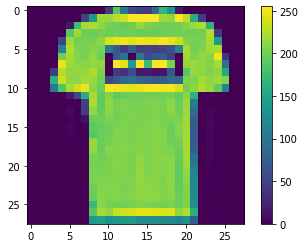

In [9]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

***4．データの前処理***

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

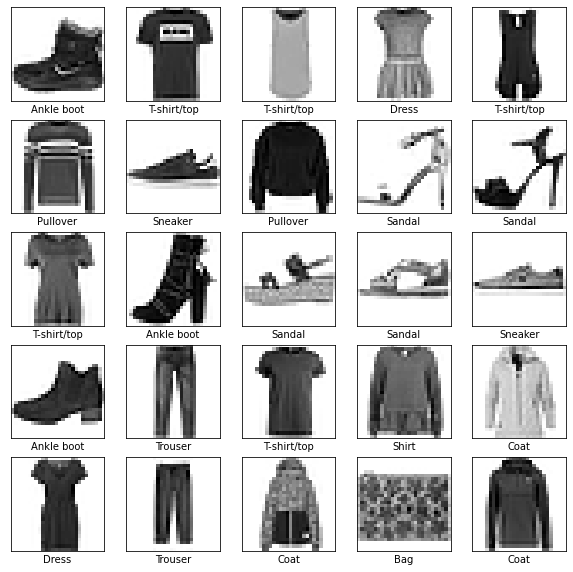

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

***5．モデルの作成***

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

***6.モデルのコンパイル***

In [13]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

***7.学習***

In [14]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6179 - accuracy: 0.7882
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3790 - accuracy: 0.8655
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3387 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3174 - accuracy: 0.8823
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2983 - accuracy: 0.8913


***8.テストデータでの評価***

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3666 - accuracy: 0.8689
Test accuracy: 0.8689000010490417


***9.分類結果の可視化***

In [16]:
predictions = model.predict(test_images)

In [17]:
predictions[0]

array([7.0000506e-06, 1.6085664e-07, 1.2140389e-06, 1.2293499e-07,
       8.9061876e-07, 9.0516143e-04, 6.5533886e-06, 1.6205059e-02,
       4.5987117e-06, 9.8286921e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]

9

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

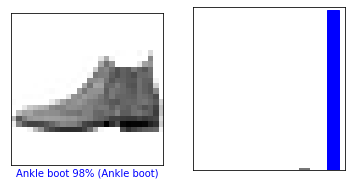

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

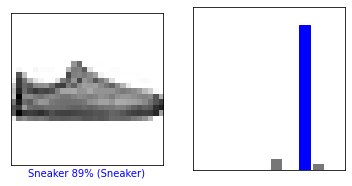

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

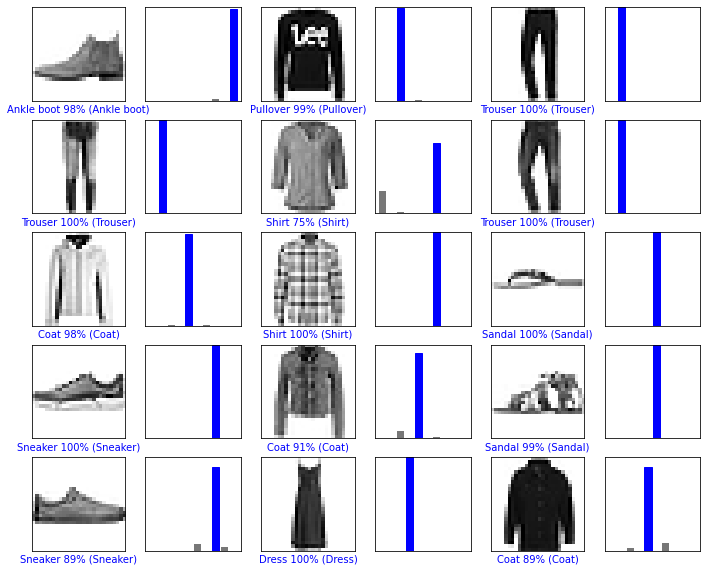

In [23]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [24]:
img = test_images[0]

print(img.shape)

(28, 28)


In [25]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = model.predict(img)

print(predictions_single)

[[7.0000642e-06 1.6085696e-07 1.2140401e-06 1.2293509e-07 8.9061967e-07
  9.0516143e-04 6.5534009e-06 1.6205059e-02 4.5987199e-06 9.8286921e-01]]


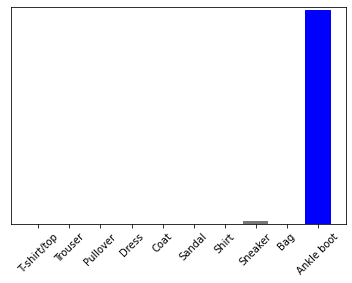

In [27]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [28]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
